Naveeda Ali 
<br>
Date: Jan. 17, 2024
<br>
PHYS 2030 W24


## <center><font color=#46769B>Exercise 2: Normal distributions and the Central Limit Theorem</font></center>

__Rubric__ (100 points total):

- Part (a) /__20 points__
     
- Part (b) /__40 points__

- Part (c) /__40 points__


## <font color=#46769B>Introduction:</font>

First, in Part (a), we will deal with sampling from normal distributions. As in the lecture notes, you should use the function `numpy.random.normal()` to generate random numbers from a normal distribution.

Second, in Parts (b) and (c), we will perform two numerical tests of the Central Limit Theorem (CLT). Recall that Monte Carlo sampling is a way of estimating the true mean from an approximation computed from random numbers. The CLT tells us how close our estimate is *likely to be* to the true value. Namely, the difference between estimate and true value scales like $1/\sqrt{N}$ and so gets smaller as $N$ becomes larger.

Our goals for this notebook are:
- Gain familiarity with sampling from __normal distributions__
- Perform two numerical experiments to verify the __Central Limit Theorem__

Required reading:
- *Lesson 2: Normal Distribitions*

## <font color=#46769B>Part (a): Sampling from normal distributions</font>

Write a code that performs the following tasks:

- Generate $N = 10^4$ samples for $x$ from $\mathcal{N}(\mu,\sigma)$, where $\mu = 3$ and $\sigma = 1$.

- Calculate and print the mean $\langle x \rangle$ and standard deviation $\Delta x$, and compare to $\mu$ and $\sigma$.

- Make a histogram plot for your samples for $x$ using `matplotlib.pyplot.hist()`.

- On the same plot, plot the normal PDF $\mathcal{N}(\mu,\sigma)$ as a function of $x$. 

Be sure that your $x$-axis is labeled, you include a legend, the number of bins is chosen appropriately, and that you have normalized the histogram correctly so that your PDF and histogram are in good agreement.

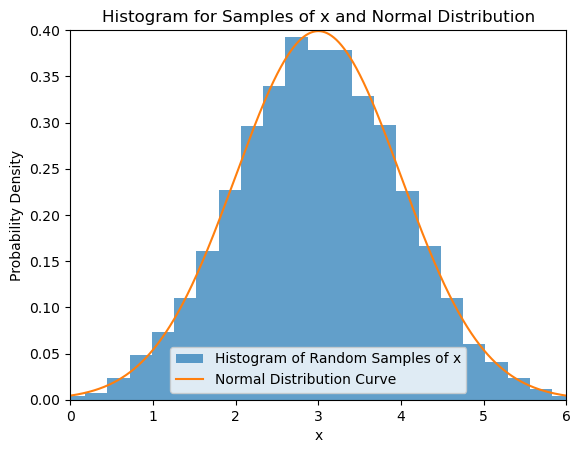

In [5]:
import numpy as np
import matplotlib.pyplot as plt

#Set mu to 3
mu = 3 
#Set sigma too 1
sigma = 1
#Set N (number of samples) to 10**4
num = 10**4

#Generate sample for x
x_samples = np.random.normal(mu,sigma,num)
#Calculate mean value
mean_x = np.mean(x_samples)
#Calculate standard deviation 
std_x = np.std(x_samples)

plt.hist(x_samples,bins=30, density=True, alpha=0.7, label="Histogram of Random Samples of x")

#Generate values for x axis for normal PDF equation
xi = np.linspace(0, 6, num) 
#Calculate values for y from normal PDF equation 
N = 1 / np.sqrt(2 * np.pi * sigma**2) * np.exp(-0.5 * (xi - mu)**2 / sigma**2)  # Use xi instead of x here
#Plot x and y values for bell-shaped normal distribution curve
plt.plot(xi, N, label='Normal Distribution Curve')

#Set x axis limits on graph
plt.xlim([0, 6])
#Set y axis limits on graph
plt.ylim([0, 0.40])

#Plot title of graph
plt.title('Histogram for Samples of x and Normal Distribution')
#Plot x axis label
plt.xlabel('x')
#Plot y axis label 
plt.ylabel('Probability Density')
#Plot legend elements
plt.legend()

#Display the plot
plt.show()



## <font color=#46769B>Part (b): Testing the CLT with flipping a coin</font>

Define a function `coin_flip(num)` that flips a coin $N$ (here $N$ is the same as `num`) times, with probability $p=0.3$ for heads ($x=1$) and probability $1-p=0.7$ for tails ($x=0$), and returns $\langle x \rangle$.

Perform the $N=1000$ coin flip experiment a total of 1000 times and make a list `means` of the 1000 results. That is, you perform the simulation 1000 times and *each simulation* has $N=1000$ coin flips. Perform the following tasks:

- Make a histogram of your results for `means` using `matplotlib.pyplot.hist()`

- On the same plot, use `matplotlib.pyplot.plt()` to plot a Gaussian curve centered at $\mu$ and with width $\sigma/\sqrt{N}$, where $\mu$ and $\sigma$ are the true mean and standard deviation of Bernoulli distribution. Note that you are not plotting $\mathcal{N}(\mu,\sigma)$ as a function of $x$, you are plotting $\mathcal{N}(\mu,\sigma/\sqrt{N})$ as a function of $x$.

Next, repeat these steps with $N=10,000$ and plot your results on the same plot above. 

You should see:

- How the distribution of means from the coin flip agrees well with a normal distribution (even though a Bernoulli distribution is not related at all to a normal distribution).

- How the distribution of means narrows (gets more accurate) as $N$ increases

For your plot, be sure to:

- Set `alpha=0.5` so you can see all histograms clearly. Choose a suitable number of bins.

- Include an $x$-axis label and a legend.

- Normalize your histograms so they agree with your Gaussian curves.




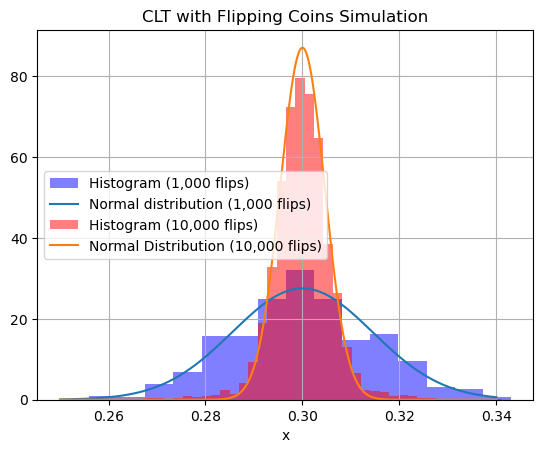

In [6]:
#Define function coin_flip(num)
def coin_flip(num):
    p_head = 0.3
    p_tail = 0.7
    options = [1,0]
    prob = [p_head, p_tail]
    
    x = np.random.choice(options, num, p=prob)
    
    mean_x = np.mean(x)
    
    return mean_x

#Run 1000 flip simulation
num = 1000
list_mean = []

for i in range(num):
    list_mean.append(coin_flip(num))
#Plot 1000 flip histogram
plt.hist(list_mean, bins=15, alpha = 0.5, density=True, color='blue', label = 'Histogram (1,000 flips)')
    
mu = 0.3
sigma = np.sqrt(0.3*(0.7))
sigma_normal = sigma/np.sqrt(num)
xi = np.linspace(0.25,0.34,num) 
N = 1 / np.sqrt(2 * np.pi * sigma_normal**2) * np.exp(-0.5 * (xi - mu)**2 / sigma_normal**2)

#Plot 1000 flip normal distribution
plt.plot(xi,N, label = 'Normal distribution (1,000 flips)')

#Run 10000 flip simulation
num = 10000

for i in range(num):
    list_mean.append(coin_flip(num))

#Plot 10000 flip histogram
plt.hist(list_mean, bins=45, alpha=0.5, density=True, color = 'red', label='Histogram (10,000 flips)')
mu = 0.3
sigma = np.sqrt(0.3*(0.7))
sigma_normal = sigma/np.sqrt(num)
xi = np.linspace(0.25,0.34,num) 
N = 1 / np.sqrt(2 * np.pi * sigma_normal**2) * np.exp(-0.5 * (xi - mu)**2 / sigma_normal**2)

#Plot 10000 flip normal distribution curve
plt.plot(xi,N, label= 'Normal Distribution (10,000 flips)')

plt.title('CLT with Flipping Coins Simulation')
plt.xlabel('x')
plt.grid(True)
plt.legend()
plt.show()


## <font color=#46769B>Part (c): Testing the CLT with a uniform distribution</font>

Define a function `sample_uniform(num)` that will generate $N$ samples for $x$ from a uniform distribution within the range $[0,2]$ and returns $\langle x \rangle$.

Now, repeat all the steps of Part (b). (Note that the true mean $\mu$ and standard deviation $\sigma$ will be different from Part (b). You can find formulas for $\mu$, $\sigma$ for a uniform distribution in Lecture Notes 2.)

As in Part (b), you should find:

- How the distribution of means for $x$ agrees well with a normal distribution (even though a uniform distribution is not related at all to a normal distribution).

- How the distribution of means narrows (gets more accurate) as $N$ increases


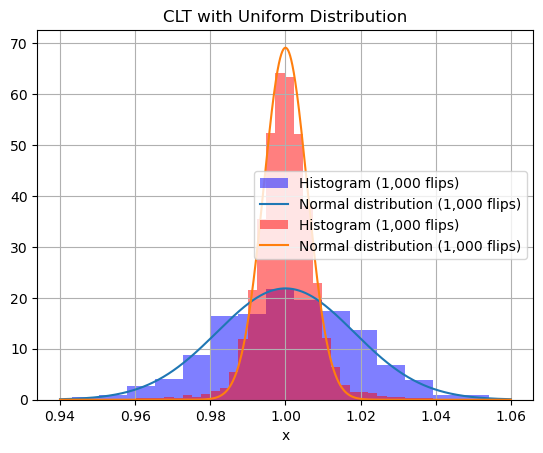

In [7]:
#Define function sample_uniform(num)
def sample_uniform(num):
    x = np.random.uniform(0,2,num)
    mean_x = np.mean(x)
    return mean_x

#Use mu and sigma equations
a = 0
b = 2

mu = (a + b)/2
sigma = (b - a) / np.sqrt(12)

list_mean = []

#1000 run simulation
num = 1000

for i in range(num):
    list_mean.append(sample_uniform(num))
#Plot 1000 run histogram  
plt.hist(list_mean, bins=15, alpha = 0.5, density=True, color='blue', label = 'Histogram (1,000 flips)')

xi = np.linspace(0.94,1.06,num) 
sigma_normal = sigma/np.sqrt(num)
N = 1 / np.sqrt(2 * np.pi * sigma_normal**2) * np.exp(-0.5 * (xi - mu)**2 / sigma_normal**2)
#Plot 1000 run normal distribution
plt.plot(xi,N, label = 'Normal distribution (1,000 flips)')

#10000 run simulation 
num = 10000

for i in range(num):
    list_mean.append(sample_uniform(num))

#Plot 10000 run histogram 
plt.hist(list_mean, bins=45, alpha = 0.5, density=True, color='red', label = 'Histogram (1,000 flips)')

xi = np.linspace(0.94,1.06,num) 
sigma_normal = sigma/np.sqrt(num)
N = 1 / np.sqrt(2 * np.pi * sigma_normal**2) * np.exp(-0.5 * (xi - mu)**2 / sigma_normal**2)

#Plot 10000 run normal distribution   
plt.plot(xi,N, label = 'Normal distribution (1,000 flips)')

plt.title('CLT with Uniform Distribution')
plt.xlabel('x')
plt.legend()
plt.grid(True)
plt.show()

